In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from wordcloud import WordCloud
from collections import Counter

from nltk.stem.porter import PorterStemmer

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('spam.csv' , encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
928,ham,Oh all have to come ah?,NaN,NaN,NaN
2657,ham,Dai &lt;#&gt; naal eruku.,NaN,NaN,NaN
3047,ham,Die... Now i have e toot fringe again...,NaN,NaN,NaN
876,ham,Are you in castor? You need to see something,NaN,NaN,NaN
3509,ham,I just saw ron burgundy captaining a party boa...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# we have only 50,12,6 values in unnamed 2,3,4 so we can drop it

df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'] , inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
# checking for duplicates
df.duplicated().sum()

403

In [8]:
df = df.drop_duplicates(keep = 'first')

In [9]:
df.shape

(5169, 2)

In [10]:
df.duplicated().sum()

0

In [11]:
# all duplicated values are removed
# we have values ham and spam in our v1 column and v1 and v2 as column name are not helpful

df.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [12]:
df.sample(5)

,target,text
2209,ham,"Hmm well, night night"
3927,ham,Babe ? I lost you ... Will you try rebooting ?
749,ham,By monday next week. Give me the full gist
2577,ham,Hey whats up? U sleeping all morning?
3117,ham,R u saying i should re order the slippers cos ...


In [13]:
# changing spam and ham

# from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [14]:
df['target'] = lb.fit_transform(df['target'])

In [15]:
df.sample(5)

,target,text
476,0,Love you aathi..love u lot..
2562,0,"Yeah I am, so I'll leave maybe 7ish?"
1899,0,I love working from home :)
82,0,Ok i am on the way to home hi hi
3577,0,They said Ì_ dun haf passport or smth like dat...


# 2. EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.value_counts()

target  text                                                                                                                              
0        &lt;#&gt;  in mca. But not conform.                                                                                                  1
        Thats cool. i liked your photos. You are very sexy!                                                                                   1
        That's good, because I need drugs                                                                                                     1
        That's fine, have him give me a call if he knows what he wants or has any questions                                                   1
        That's fine, I'll bitch at you about it later then                                                                                    1
                                                                                                                                             

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1cf9c56d010>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

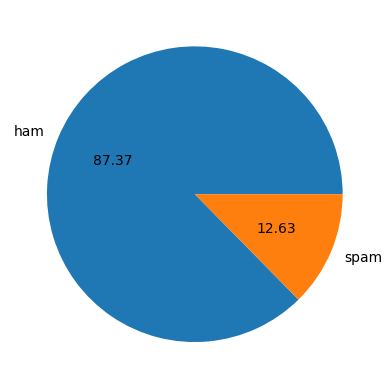

In [19]:
plt.pie(df['target'].value_counts() , labels = ['ham','spam'] , autopct = "%0.2f")

In [20]:
# creating new features to count characters,words and sentences
# import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sushant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['text'].apply(lambda x : len(x))

In [22]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [23]:
df['num_sentence'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [24]:
df.head(5)

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
nltk.sent_tokenize('hi there')

['hi there']

In [26]:
df[df['target'] == 0][['num_characters','num_words' , 'num_sentence']].describe()
# analysis for ham

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# analysis for spam
df[df['target'] == 1][['num_characters','num_words' , 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

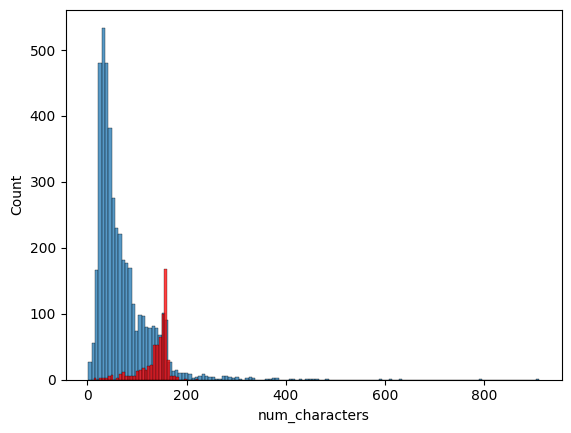

In [28]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'] , color = 'red')

In [29]:

# sorted(df[df['num_characters'] >= 400]['target'], reverse=True)

In [30]:
(df[df['num_characters'] >= 400]['target']).value_counts()

target
0    13
Name: count, dtype: int64

<Axes: xlabel='num_words', ylabel='Count'>

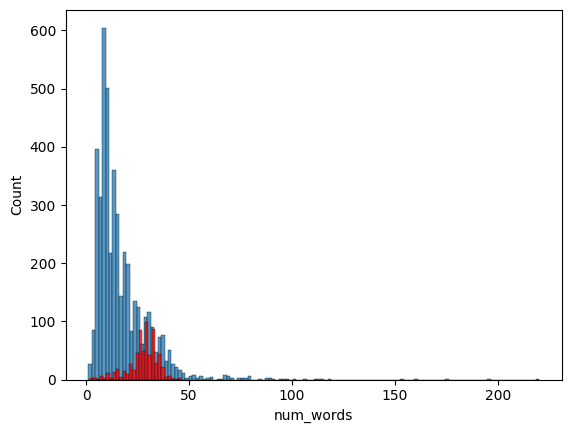

In [31]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'] , color = 'red')

<Axes: xlabel='num_sentence', ylabel='Count'>

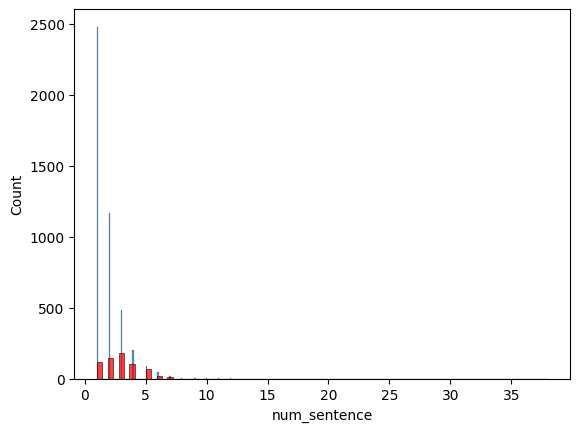

In [32]:
sns.histplot(df[df['target']==0]['num_sentence'])
sns.histplot(df[df['target']==1]['num_sentence'] , color = 'red')

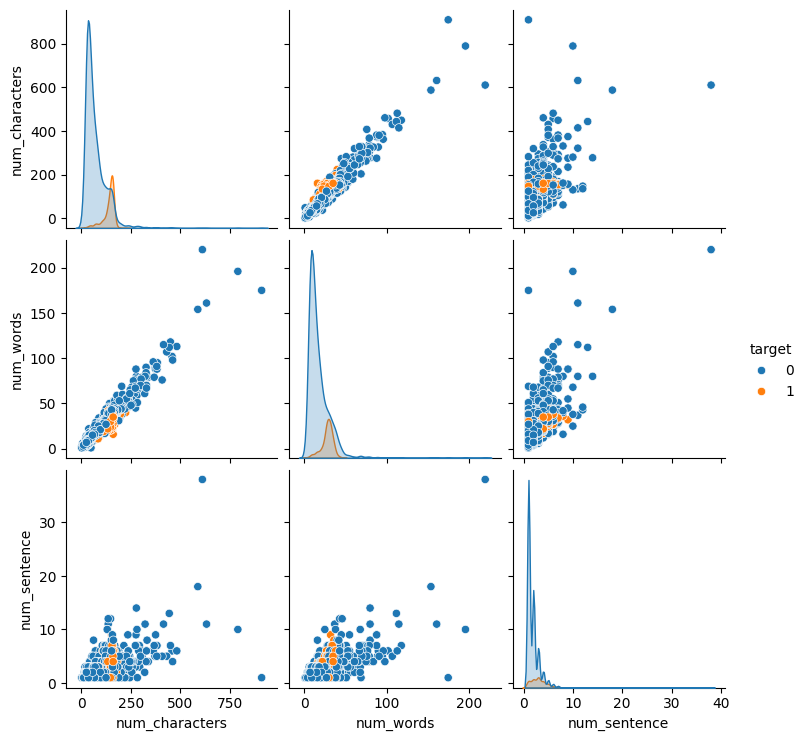

In [33]:
sns.pairplot(df  , hue = 'target')

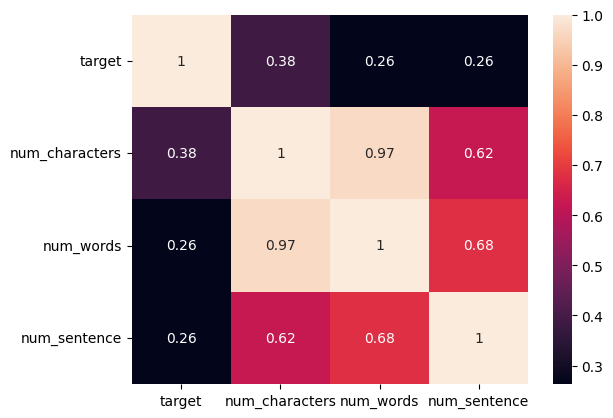

In [34]:
# sns.heatmap(df.corr() , annot=True)
# df.corr
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()
# sns.heatmap(df['num_characters','num_words' , 'num_sentence'].corr(),annot=True)

# 3. data preprocessing
    Lower case
    Tokenization
    Removing special characters
    Removing stop words and punctuation
    Stemming


In [35]:
# df['text'] = df['text'].apply(lambda x:x.lower())

In [36]:
# df.sample()

In [37]:
from nltk.stem.porter import PorterStemmer

In [38]:
ps = PorterStemmer()

In [39]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sushant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sushant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
def transform_txt(text):
    text = text.lower()
    text = nltk.word_tokenize(text , language = 'english')
    stop_words = set(stopwords.words('english'))
    # removing special characters ( removing all non alphanumeric values)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    # removing stop words and punctuation
    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    
    # stemming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)


# Example usage
sample_text = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
processed_text = transform_txt(sample_text)
print(processed_text)


go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [43]:
transform_txt('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [44]:
# len(stopwords.words('english'))
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [46]:
df['transformed_txt'] = df['text'].apply(transform_txt)

In [47]:
df.sample(5)

,target,text,num_characters,num_words,num_sentence,transformed_txt
723,0,Ya even those cookies have jelly on them,40,8,1,ya even cooki jelli
3460,0,K.. I yan jiu liao... Sat we can go 4 bugis vi...,155,46,4,k yan jiu liao sat go 4 bugi vill one frm 10 3...
2598,0,Okie... Thanx...,16,4,1,oki thanx
680,0,What is this 'hex' place you talk of? Explain!,46,12,2,place talk explain
5051,0,"Tick, tick, tick .... Where are you ? I could ...",111,29,3,tick tick tick could die loneli know pout stom...


**creating word cloud**

In [48]:
wc = WordCloud(width = 420 , height = 200, min_font_size=10 , background_color='white')

In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_txt'].str.cat(sep = " "))

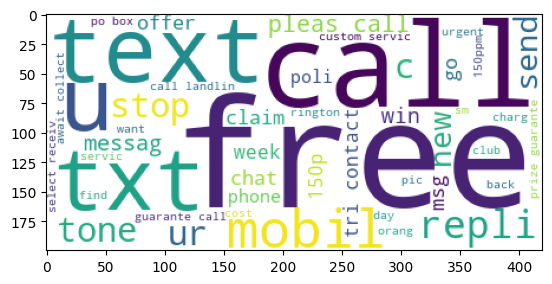

In [50]:
plt.imshow(spam_wc)

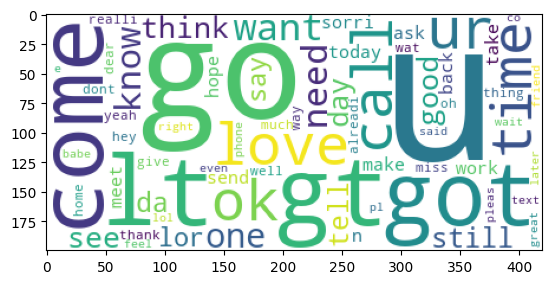

In [51]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_txt'].str.cat(sep = " "))
plt.imshow(ham_wc)


In [52]:
# filtering top 30 common words in ham and spam cateogries

# df[df['target'] == 1]['transformed_txt'].cat()
combined_text = ' '.join(df[df['target'] == 1]['transformed_txt'])
print(combined_text)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red wi

In [53]:
from collections import Counter
from nltk import word_tokenize 


In [54]:

combined_spam_text = ' '.join(df[df['target'] == 1]['transformed_txt'])
combined_ham_text = ' '.join(df[df['target'] == 0]['transformed_txt'])

tokens_spam = word_tokenize(combined_spam_text)
tokens_ham = word_tokenize(combined_ham_text)

# Count the frequency of each word
word_counts_spam = Counter(tokens_spam)
word_counts_ham = Counter(tokens_ham)

# Get the top 30 most frequent words
top_30_words = word_counts_spam.most_common(30)
top_30_words1 = word_counts_ham.most_common(30)


spam_freq_df = pd.DataFrame(top_30_words)
ham_freq_df = pd.DataFrame(top_30_words1)

In [55]:
ham_freq_df


,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


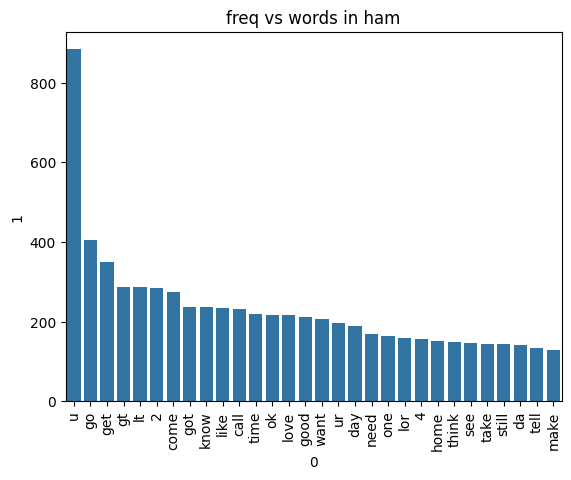

In [56]:
sns.barplot(x = ham_freq_df[0] , y = ham_freq_df[1])
plt.xticks(rotation='vertical')
plt.title(label = 'freq vs words in ham')
plt.show()

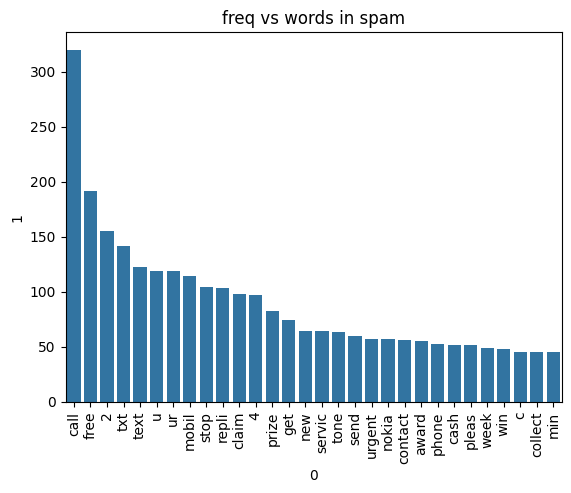

In [57]:
sns.barplot(x = spam_freq_df[0] , y = spam_freq_df[1])
plt.xticks(rotation='vertical')
plt.title(label = 'freq vs words in spam')
plt.show()


# model building

In [58]:
# step 1 : we need to transform all the transformed_text to vector 
# from sklearn.feature_extraction.text import CountVectorizer


In [59]:
cv = CountVectorizer()

In [60]:
# print(cv.fit_transform(df['transformed_txt']).toarray().shape)
X = cv.fit_transform(df['transformed_txt']).toarray()

In [61]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [62]:
X.shape

(5169, 6708)

In [63]:
y = df['target'].values

In [64]:
from sklearn.model_selection import train_test_split


In [65]:
X_train,X_test , y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state=2 )

In [66]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [69]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [70]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
